Imported Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
V = pd.read_csv('/content/bank.csv')

In [ ]:
V.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:

V.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1423,48,management,married,secondary,no,4415,yes,no,cellular,8,apr,1032,3,141,7,failure,yes
9196,47,blue-collar,single,unknown,no,2443,no,no,unknown,18,jun,422,1,-1,0,unknown,no
4454,50,housemaid,married,secondary,no,388,no,no,cellular,11,mar,203,2,-1,0,unknown,yes
2869,41,services,married,tertiary,no,881,no,no,cellular,30,oct,257,3,-1,0,unknown,yes
2772,44,technician,single,tertiary,no,643,no,no,cellular,16,oct,324,1,143,3,failure,yes
1442,33,technician,single,secondary,no,719,yes,no,cellular,9,apr,448,2,316,6,failure,yes
10966,54,technician,married,tertiary,no,6507,no,no,cellular,26,may,145,1,-1,0,unknown,no
4903,41,management,married,primary,no,5310,yes,no,cellular,17,nov,984,1,-1,0,unknown,yes
5173,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,nov,594,1,91,1,success,yes
6062,25,management,single,tertiary,no,2399,yes,no,unknown,3,jun,193,2,-1,0,unknown,no


upper graph telling that only few peoples have the most of the money...like only 5 percent people have 90 percent money
  .........highly skewed data.......

<Axes: xlabel='loan', ylabel='count'>

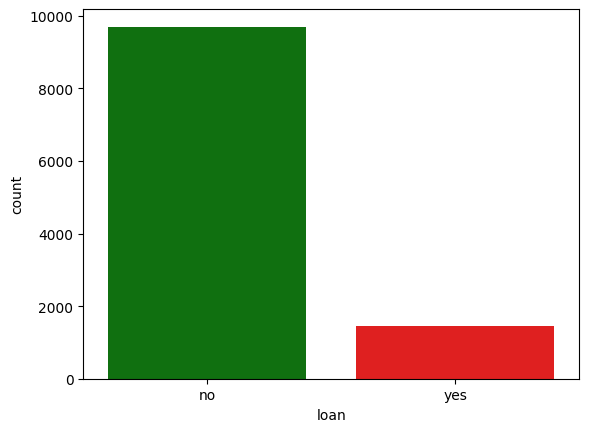

In [ ]:
sns.countplot(x='loan', data = V, palette={'yes': 'red', 'no': 'green'})

........upper function would not work because boxplot work only when  x axis is categorical and y axis is numerical....

.......by above graph we could get a basic idea that married people have taken more loan rathar than single or divorced.............

majority age lies  between 30 to 40 .....afrtwe 70 to above 90 there is outlieners........noisy data means yes they exist but rare ....


................for missing values ...........

In [ ]:
V.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


by above info we could get the knowledge that 75 percent of people have  lesser tahn 1700 money some hae 110 may some have 500 or 1000 and so on.......

In [ ]:
V.duplicated().sum()

np.int64(0)

by above we have 0 duplicacy number........

<Axes: xlabel='loan', ylabel='balance'>

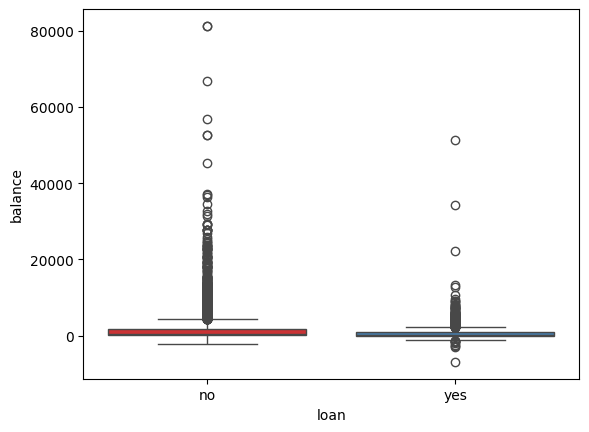

In [ ]:
sns.boxplot(x='loan', y='balance', data=V, palette='Set1')


**we are gooan train the m**

In [ ]:
V['loan'].value_counts(normalize=True) * 100


,proportion
loan,
no,86.919907
yes,13.080093


In [ ]:
V.shape

(11162, 17)

In [ ]:
V.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(V['loan'].unique())


['no' 'yes']


In [ ]:
V['loan_num'] = V['loan'].map({'yes': 1, 'no': 0})


In [ ]:
V[['loan', 'loan_num']].head(10)


,loan,loan_num
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,yes,1
6,yes,1
7,no,0
8,no,0
9,no,0


Text(0, 0.5, 'balance')

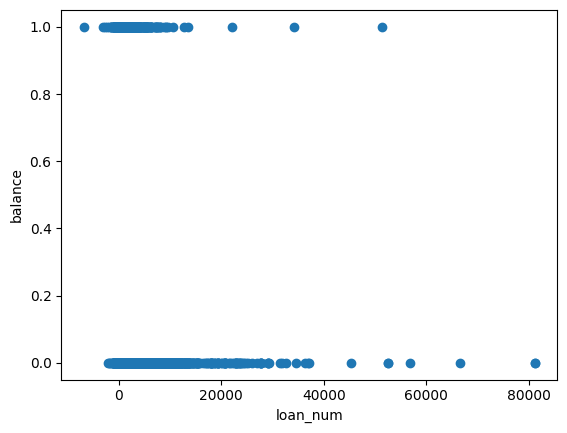

In [ ]:
plt.scatter(V['balance'] , V['loan_num'])
plt.xlabel('loan_num')
plt.ylabel('balance')

<Axes: xlabel='balance', ylabel='loan_num'>

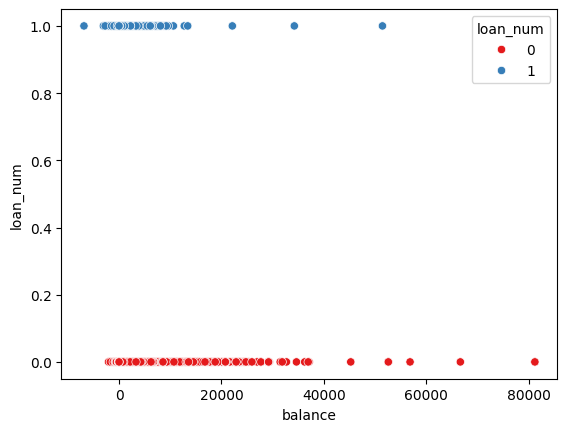

In [ ]:

sns.scatterplot(x=V['balance'], y=V['loan_num'], hue=V['loan_num'], palette='Set1')


**.........gonna do train test split...**

In [ ]:
y = V['loan_num']


In [ ]:
x = V[['balance']]


In [ ]:
from sklearn.model_selection import train_test_split

below function is printing 4 tpes of data
1). x trained (90 percent data  we  keeping for training   
2). x test (10 percent  normal)
3). y (90 percent data  we  keeping for training )  
4)  y test target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x , y ,test_size = 0.1)

lower function is for futher use of training data...

In [ ]:
x_train

,balance
2060,513
3697,654
10866,2590
6590,1039
6150,909
...,...
7768,78
5116,190
10035,-195
2960,1204


lower function is for futher use of training data...

In [ ]:
y_train

,loan_num
2060,1
3697,0
10866,0
6590,0
6150,1
...,...
7768,0
5116,0
10035,1
2960,0


In [ ]:
x_test

,balance
1641,377
7568,1575
7585,11016
9931,505
10485,144
...,...
9956,67
9130,-183
2920,1331
8038,573


In [ ]:
y_test

,loan_num
1641,0
7568,0
7585,0
9931,0
10485,1
...,...
9956,0
9130,0
2920,0
8038,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[-0.31652585],
       [-0.27232285],
       [ 0.33460624],
       ...,
       [-0.53848132],
       [-0.09989981],
       [ 0.49323544]])

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.35916136],
       [ 0.01640736],
       [ 2.97612718],
       ...,
       [-0.06008577],
       [-0.29771606],
       [-0.5403623 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

.........this below following function is for model training .........

In [ ]:
clf.fit(x_train ,  y_train)

LogisticRegression()

we have reserved 10 percentdat means not trained this...and 90 percent we yhave trained x y data ...now this 10 percent data we will use to predict over the 90 percent trained data ....

below syntax is reserved x of 10 percent ....its preicting who have taken the loan ...by gettiong the input x (input is balance ) and predicting y ....in clf.predict ... which is of loan input ....predcting from 90 percent trained  laon ....( x = balance ,y =loan prediction) this just below syntax is predicting loan by getting the input of  balance....

In [ ]:
 y_pred =clf.predict(x_test)

this is our output ..of non trained ....now we match the balance loan prediction to actula gotten loan

In [ ]:
y_test

,loan_num
1641,0
7568,0
7585,0
9931,0
10485,1
...,...
9956,0
9130,0
2920,0
8038,1


so by above dat of test x and y this

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test  , y_pred)*100

87.19785138764547

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

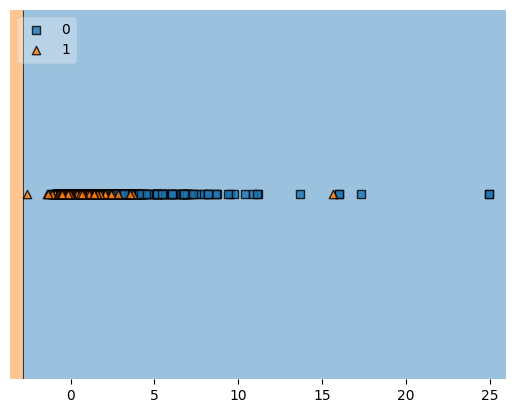

In [ ]:
plot_decision_regions(x_train ,y_train.values, clf = clf , legend = 2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[974   0]
 [143   0]]


In [ ]:
print(V['loan_num'].value_counts())


loan_num
0    9702
1    1460
Name: count, dtype: int64
